


Imports & Reproducibility

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

Load MNIST Dataset

In [5]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

print('Training data shape:', x_train_cnn.shape)
print('Testing data shape:', x_test_cnn.shape)

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


Early Stopping

In [6]:
# EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

CNN Builder

In [7]:
# CNN Builder
def build_cnn(activation='relu', dropout_rate=0.25):
    model = Sequential([
        Conv2D(32, (3,3), activation=activation, input_shape=(28,28,1)),
        Conv2D(64, (3,3), activation=activation),
        MaxPooling2D((2,2)),
        Dropout(dropout_rate),
        Flatten(),
        Dense(128, activation=activation),
        Dense(10, activation='softmax')
    ])
    return model

Activation Function Challenge

In [8]:
# Task 1: Activation Function Challenge
activations = ['sigmoid', 'tanh', 'relu']
results = []
histories = {}

for act in activations:
    print('\nTraining CNN with Activation:', act)
    model = build_cnn(activation=act)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(
        x_train_cnn, y_train,
        epochs=10,
        validation_data=(x_test_cnn, y_test),
        callbacks=[early_stop],
        verbose=1
    )
    test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=0)
    results.append(['CNN-Activation', act, 'Adam', len(history.history['loss']), test_acc])
    histories[act] = history


Training CNN with Activation: sigmoid


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 184s 97ms/step - accuracy: 0.1049 - loss: 2.3522 - val_accuracy: 0.1028 - val_loss: 2.3110
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 179s 96ms/step - accuracy: 0.1047 - loss: 2.3081 - val_accuracy: 0.1028 - val_loss: 2.3111
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 181s 97ms/step - accuracy: 0.1044 - loss: 2.3082 - val_accuracy: 0.1028 - val_loss: 2.3115
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 180s 96ms/step - accuracy: 0.1042 - loss: 2.3083 - val_accuracy: 0.1028 - val_loss: 2.3114

Training CNN with Activation: tanh
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 181s 96ms/step - accuracy: 0.9243 - loss: 0.2519 - val_accuracy: 0.9770 - val_loss: 0.0735
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 178s 95ms/step - accuracy: 0.9804 - loss: 0.0663 - val_accuracy: 0.9788 - val_loss: 0.0654
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 179s 96ms/step - accuracy: 0.9837 - loss: 0.0549 - val_accuracy: 0.9798 - val_loss: 0.0607
Epoch 4/10
1875/1875 ━━━━━━━━━━━━

Plot Activation Loss Curves

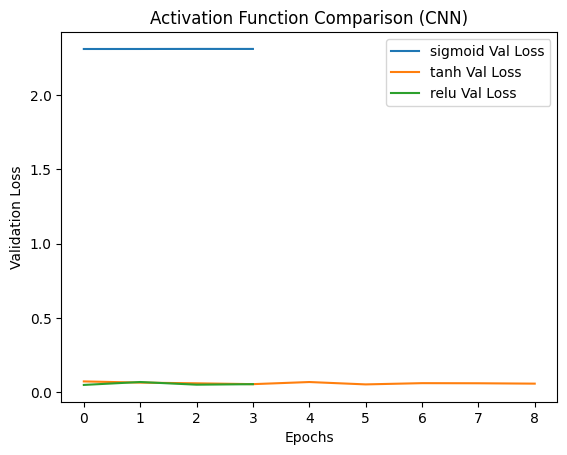

In [9]:
# Plot Activation Loss Curves
plt.figure()
for act in activations:
    plt.plot(histories[act].history['val_loss'], label=f'{act} Val Loss')
plt.title('Activation Function Comparison (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

Optimizer Showdown (Using Best Activation: ReLU)

In [10]:
# Task 2: Optimizer Showdown (Using Best Activation: ReLU)
optimizers = {
    'SGD': SGD(),
    'SGD+Momentum': SGD(momentum=0.9),
    'Adam': Adam()
}

optimizer_histories = {}

for opt_name, opt in optimizers.items():
    print('\nTraining CNN with Optimizer:', opt_name)
    model = build_cnn(activation='relu')
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(
        x_train_cnn, y_train,
        epochs=10,
        validation_data=(x_test_cnn, y_test),
        callbacks=[early_stop],
        verbose=1
    )
    test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=0)
    results.append(['CNN-Optimizer', 'ReLU', opt_name, len(history.history['loss']), test_acc])
    optimizer_histories[opt_name] = history


Training CNN with Optimizer: SGD
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 162s 86ms/step - accuracy: 0.7727 - loss: 0.7499 - val_accuracy: 0.9409 - val_loss: 0.1901
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 160s 85ms/step - accuracy: 0.9409 - loss: 0.1946 - val_accuracy: 0.9609 - val_loss: 0.1214
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 161s 86ms/step - accuracy: 0.9597 - loss: 0.1348 - val_accuracy: 0.9707 - val_loss: 0.0909
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 165s 88ms/step - accuracy: 0.9707 - loss: 0.0998 - val_accuracy: 0.9751 - val_loss: 0.0738
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 164s 88ms/step - accuracy: 0.9765 - loss: 0.0810 - val_accuracy: 0.9800 - val_loss: 0.0616
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 162s 86ms/step - accuracy: 0.9808 - loss: 0.0653 - val_accuracy: 0.9819 - val_loss: 0.0552
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 164s 88ms/step - accuracy: 0.9840 - loss: 0.0563 - val_accuracy: 0.9847 - val_loss: 0.0473
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━

Plot Optimizer Accuracy Curves

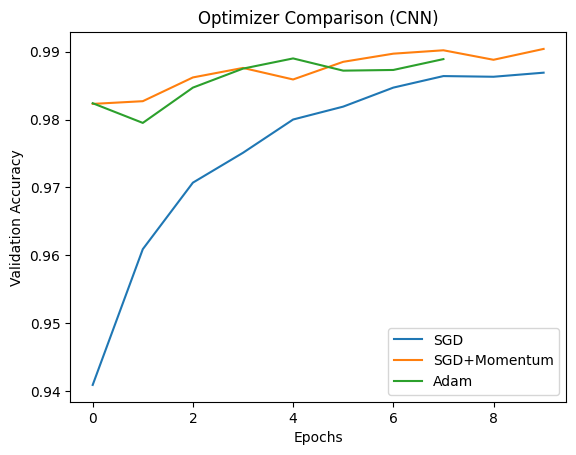

In [11]:
# Plot Optimizer Accuracy Curves
plt.figure()
for opt_name in optimizers.keys():
    plt.plot(optimizer_histories[opt_name].history['val_accuracy'], label=opt_name)
plt.title('Optimizer Comparison (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


BatchNorm + Dropout Scenarios

In [13]:
# Task 3: BatchNorm + Dropout Scenarios

def build_cnn_variant(use_bn=False, dropout_rate=0.0):
    model = Sequential()

    # Convolution Layers
    model.add(Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
    model.add(Conv2D(64, (3,3), activation="relu"))
    model.add(MaxPooling2D((2,2)))

    # Add Batch Normalization ONLY if enabled
    if use_bn:
        model.add(BatchNormalization())

    # Add Dropout ONLY if rate > 0
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dense(10, activation="softmax"))

    return model


# Required Scenarios
scenarios = [
    ("No BN, No Dropout", False, 0.0),
    ("No BN, Dropout=0.1", False, 0.1),
    ("With BN, Dropout=0.25", True, 0.25)
]

scenario_histories = {}

# Run Experiments
for name, bn, dr in scenarios:
    print("\nScenario:", name)

    model = build_cnn_variant(use_bn=bn, dropout_rate=dr)

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        x_train_cnn, y_train,
        epochs=10,
        validation_data=(x_test_cnn, y_test),
        callbacks=[early_stop],
        verbose=1
    )

    test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=0)

    results.append(["CNN-Scenario", "ReLU", name, len(history.history["loss"]), test_acc])

    scenario_histories[name] = history



Scenario: No BN, No Dropout
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 175s 92ms/step - accuracy: 0.9242 - loss: 0.2440 - val_accuracy: 0.9837 - val_loss: 0.0518
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 168s 89ms/step - accuracy: 0.9879 - loss: 0.0398 - val_accuracy: 0.9872 - val_loss: 0.0454
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 173s 92ms/step - accuracy: 0.9933 - loss: 0.0226 - val_accuracy: 0.9856 - val_loss: 0.0559
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 173s 92ms/step - accuracy: 0.9954 - loss: 0.0148 - val_accuracy: 0.9882 - val_loss: 0.0456
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 168s 90ms/step - accuracy: 0.9960 - loss: 0.0115 - val_accuracy: 0.9895 - val_loss: 0.0494

Scenario: No BN, Dropout=0.1
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 180s 95ms/step - accuracy: 0.9222 - loss: 0.2495 - val_accuracy: 0.9835 - val_loss: 0.0510
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 196s 92ms/step - accuracy: 0.9877 - loss: 0.0403 - val_accuracy: 0.9723 - val_loss: 0.0914
Epoch 3/10

MLP Builder

In [14]:
# MLP Builder
def build_mlp(layer_sizes=[256], optimizer='adam', use_bn=True):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))

    for size in layer_sizes:
        model.add(Dense(size))
        if use_bn:
            model.add(BatchNormalization())
        model.add(tf.keras.layers.ReLU())

    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


Required MLP Experiments

In [15]:
# Required MLP Experiments
mlp_experiments = [
    ('MLP-1', [512,256,128], SGD(), 20),
    ('MLP-2', [256], Adam(), 15)
]

for name, layers, opt, epochs in mlp_experiments:
    print('\nTraining:', name)
    model = build_mlp(layer_sizes=layers, optimizer=opt)
    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        validation_data=(x_test, y_test),
        callbacks=[early_stop],
        verbose=1
    )
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    results.append([name, 'ReLU', opt.__class__.__name__, len(history.history['loss']), test_acc])



Training: MLP-1


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8384 - loss: 0.5748 - val_accuracy: 0.9609 - val_loss: 0.1395
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9577 - loss: 0.1564 - val_accuracy: 0.9694 - val_loss: 0.1029
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9759 - loss: 0.0981 - val_accuracy: 0.9739 - val_loss: 0.0886
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9867 - loss: 0.0650 - val_accuracy: 0.9760 - val_loss: 0.0806
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9923 - loss: 0.0441 - val_accuracy: 0.9767 - val_loss: 0.0762
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9961 - loss: 0.0304 - val_accuracy: 0.9771 - val_loss: 0.0737
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9980 - loss: 0.0213 - val_accuracy: 0.9773 - val_loss: 0.0724
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9990 - loss: 0

Final Comparison Table

In [16]:
# Final Comparison Table
df = pd.DataFrame(results, columns=['Experiment', 'Activation', 'Optimizer', 'Epochs', 'Final Test Accuracy'])
df


,Experiment,Activation,Optimizer,Epochs,Final Test Accuracy
0,CNN-Activation,sigmoid,Adam,4,0.1028
1,CNN-Activation,tanh,Adam,9,0.9831
2,CNN-Activation,relu,Adam,4,0.9835
3,CNN-Optimizer,ReLU,SGD,10,0.9869
4,CNN-Optimizer,ReLU,SGD+Momentum,10,0.9897
5,CNN-Optimizer,ReLU,Adam,8,0.9890
6,CNN-Scenario,ReLU,"No BN, No Dropout",5,0.9872
7,CNN-Scenario,ReLU,"No BN, Dropout=0.1",6,0.9880
8,CNN-Scenario,ReLU,"With BN, Dropout=0.25",5,0.9868
9,MLP-1,ReLU,SGD,13,0.9775
